We have seen many examples of creating new columns of tables by applying functions to existing columns or to other arrays. All of those functions took arrays as their arguments. But frequently we will want to convert the entries in a column by a function that doesn't take an array as its argument. For example, it might take just one number as its argument, as in the function cut_off_at_100 defined below.



In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
def cut_off_at_100(x):
    
    return min(x, 100)

In [4]:
cut_off_at_100(17)

17

In [5]:
cut_off_at_100(117)

100

In [6]:
cut_off_at_100(100)

100

The function cut_off_at_100 simply returns its argument if the argument is less than or equal to 100. But if the argument is greater than 100, it returns 100.

In our earlier examples using Census data, we saw that the variable AGE had a value 100 that meant "100 years old or older". Cutting off ages at 100 in this manner is exactly what cut_off_at_100 does.

To use this function on many ages at once, we will have to be able to refer to the function itself, without actually calling it. Analogously, we might show a cake recipe to a chef and ask her to use it to bake 6 cakes. In that scenario, we are not using the recipe to bake any cakes ourselves; our role is merely to refer the chef to the recipe. Similarly, we can ask a table to call cut_off_at_100 on 6 different numbers in a column.

First, we create the table ages with a column for people and one for their ages. For example, person C is 52 years old.

In [11]:
ages= pd.DataFrame(
{'Person':np.array(('A', 'B', 'C', 'D', 'E', 'F')),
  'Age'  :np.array((17, 117, 52, 100, 6, 101))
}
)
ages

,Person,Age
0,A,17
1,B,117
2,C,52
3,D,100
4,E,6
5,F,101


apply 
To cut off each of the ages at 100, we will use the a new Table method. The apply method calls a function on each element of a column, forming a new array of return values. To indicate which function to call, just name it (without quotation marks or parentheses). The name of the column of input values is a string that must still appear within quotation marks.

In [20]:
p=ages['Age'].apply(cut_off_at_100)
p

0     17
1    100
2     52
3    100
4      6
5    100
Name: Age, dtype: int64

What we have done here is apply the function cut_off_at_100 to each value in the Age column of the table ages. The output is the array of corresponding return values of the function. For example, 17 stayed 17, 117 became 100, 52 stayed 52, and so on.

This array, which has the same length as the original Age column of the ages table, can be used as the values in a new column called Cut Off Age alongside the existing Person and Age columns.

In [24]:
ages['Cut Off Age'] = ages['Age'].apply(cut_off_at_100)
ages

,Person,Age,Cut Off Age
0,A,17,17
1,B,117,100
2,C,52,52
3,D,100,100
4,E,6,6
5,F,101,100


## Functions as Values
We've seen that Python has many kinds of values. For example, 6 is a number value, "cake" is a text value, Table() is an empty table, and ages is a name for a table value (since we defined it above).

In Python, every function, including cut_off_at_100, is also a value. It helps to think about recipes again. A recipe for cake is a real thing, distinct from cakes or ingredients, and you can give it a name like "Ani's cake recipe." When we defined cut_off_at_100 with a def statement, we actually did two separate things: we created a function that cuts off numbers at 100, and we gave it the name cut_off_at_100.

We can refer to any function by writing its name, without the parentheses or arguments necessary to actually call it. We did this when we called apply above. When we write a function's name by itself as the last line in a cell, Python produces a text representation of the function, just like it would print out a number or a string value.

In [26]:
cut_off_at_100

<function __main__.cut_off_at_100(x)>

In [27]:
cut_off = cut_off_at_100

Now cut_off is a name for a function. It's the same function as cut_off_at_100, so the printed value is exactly the same.

In [28]:
cut_off

<function __main__.cut_off_at_100(x)>

## Example: Prediction
    Data Science is often used to make predictions about the future. If we are trying to predict an outcome for a particular individual – for example, how she will respond to a treatment, or whether he will buy a product – it is natural to base the prediction on the outcomes of other similar individuals.

Charles Darwin's cousin Sir Francis Galton was a pioneer in using this idea to make predictions based on numerical data. He studied how physical characteristics are passed down from one generation to the next.

The data below are Galton's carefully collected measurements on the heights of parents and their adult children. Each row corresponds to one adult child. The variables are a numerical code for the family, the heights (in inches) of the father and mother, a "midparent height" which is a weighted average [1] of the height of the two parents, the number of children in the family, as well as the child's birth rank (1 = oldest), gender, and height.

In [30]:
galton=pd.read_csv("galton.csv")
galton

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


A primary reason for collecting the data was to be able to predict the adult height of a child born to parents similar to those in the dataset. Let us try to do this, using midparent height as the variable on which to base our prediction. Thus midparent height is our predictor variable.

The table heights consists of just the midparent heights and child's heights. The scatter plot of the two variables shows a positive association, as we would expect for these variables.

In [33]:
galtonheights=galton.rename(columns={
    'midparentHeight': 'MidParent',
    'childHeight': 'Child'
})
galtonheights

,family,father,mother,MidParent,children,childNum,gender,Child
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


In [48]:
newg=galtonheights[['MidParent','Child']]
newg

,MidParent,Child
0,75.43,73.2
1,75.43,69.2
2,75.43,69.0
3,75.43,69.0
4,73.66,73.5
...,...,...
929,66.64,64.0
930,66.64,62.0
931,66.64,61.0
932,65.27,66.5


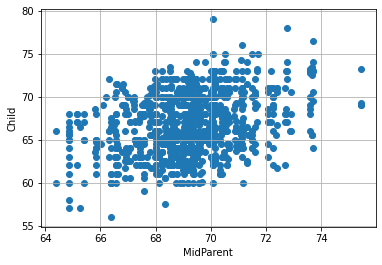

In [38]:
MidParent=galtonheights['MidParent']
Child    = galtonheights['Child']
plt.scatter(MidParent,Child)
plt.xlabel('MidParent')
plt.ylabel('Child')
plt.grid(True)
plt.show()

Now suppose Galton encountered a new couple, similar to those in his dataset, and wondered how tall their child would be. What would be a good way for him to go about predicting the child's height, given that the midparent height was, say, 68 inches?

One reasonable approach would be to base the prediction on all the points that correspond to a midparent height of around 68 inches. The prediction equals the average child's height calculated from those points alone.

Let's pretend we are Galton and execute this plan. For now we will just make a reasonable definition of what "around 68 inches" means, and work with that. Later in the course we will examine the consequences of such choices.

We will take "close" to mean "within half an inch". The figure below shows all the points corresponding to a midparent height between 67.5 inches and 68.5 inches. These are all the points in the strip between the red lines. Each of these points corresponds to one child; our prediction of the height of the new couple's child is the average height of all the children in the strip. That's represented by the gold dot.

Ignore the code, and just focus on understanding the mental process of arriving at that gold dot.

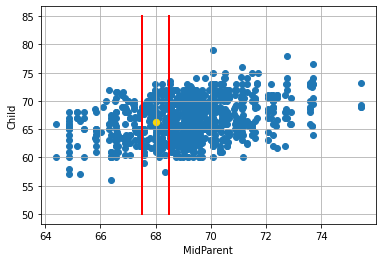

In [43]:
MidParent=galtonheights['MidParent']
Child    = galtonheights['Child']
plt.scatter(MidParent,Child)
plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plt.scatter(68, 66.24, color='gold', s=40)
plt.xlabel('MidParent')
plt.ylabel('Child')
plt.grid(True)
plt.show()

In order to calculate exactly where the gold dot should be, we first need to indentify all the points in the strip. These correspond to the rows where MidParent is between 67.5 inches and 68.5 inches.

In [49]:
close_to_68 = newg[(newg['MidParent'] >= 67.5) & (newg['MidParent'] < 68.5)]
close_to_68

,MidParent,Child
233,68.44,62.0
396,67.94,71.2
397,67.94,67.0
516,68.33,62.5
517,68.23,73.0
...,...,...
885,67.60,69.0
886,67.60,68.0
887,67.60,67.7
888,67.60,64.5


The predicted height of a child who has a midparent height of 68 inches is the average height of the children in these rows. That's 66.24 inches.

In [52]:
mean=np.mean(close_to_68['Child'])
mean

66.24045801526718

We now have a way to predict the height of a child given any value of the midparent height near those in our dataset. We can define a function predict_child that does this. The body of the function consists of the code in the two cells above, apart from choices of names.

In [66]:
def predict_child(mpht):
     """Predict the height of a child whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children whose midparent height is
    in the range mpht plus or minus 0.5.
    """
         close_points = newg[newg['MidParent'].between(mpht-0.5, mpht + 0.5)]
         return close_points['Child'].mean()   

In [67]:
predict_child(68)

66.24045801526718

In [68]:
predict_child(74)

70.41578947368421

How good are these predictions? We can get a sense of this by comparing the predictions with the data that we already have. To do this, we first apply the function predict_child to the column of Midparent heights, and collect the results in a new column called Prediction.

In [70]:
heights_with_predictions = newg.copy()
heights_with_predictions['Prediction'] = heights_with_predictions['MidParent'].apply(predict_child)
heights_with_predictions

,MidParent,Child,Prediction
0,75.43,73.2,70.100000
1,75.43,69.2,70.100000
2,75.43,69.0,70.100000
3,75.43,69.0,70.100000
4,73.66,73.5,70.415789
...,...,...,...
929,66.64,64.0,65.156579
930,66.64,62.0,65.156579
931,66.64,61.0,65.156579
932,65.27,66.5,64.229630


To see where the predictions lie relative to the observed data, we can draw overlaid scatter plots with MidParent as the common horizontal axis.

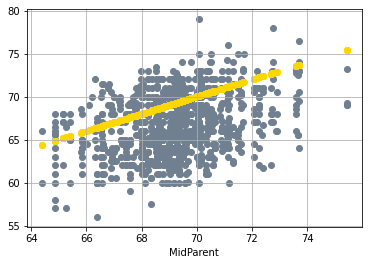

In [74]:
plt.scatter( newg['MidParent'],  newg['Child'], color='slategrey')
plt.scatter( newg['MidParent'],  newg['MidParent'], color='gold')
plt.xlabel('MidParent')
plt.grid(True)
plt.show()

The graph of gold dots is called a graph of averages, because each gold dot is the center of a vertical strip like the one we drew earlier. Each one provides a prediction of a child's height given the midparent height. For example, the scatter shows that for a midparent height of 72 inches, the predicted height of the child would be somewhere between 68 inches and 69 inches, and indeed predict_child(72) returns 68.5.